In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop
import os

In [ ]:
import requests, os
from duckduckgo_search import ddg_images



# This script downloads images from the internet based on a user's search term,
# using DuckDuckGo image search. It keeps downloading one image at a time
# until the user chooses to stop.

term = input("Type of image you want to downlad")
os.makedirs("dataset", exist_ok=True)
count = 0

while True:
    res = ddg_images(term, max_results=1)
    if not res: break
    url = res[0]['image']
    img = requests.get(url).content
    count += 1
    with open(f"dataset/{term.replace(' ', '_')}_{count}.jpg", 'wb') as f:
        f.write(img)
    print(f"Downloaded {count}")
    if input("Download more? (y/n): ").lower() != 'y': break


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

validation_dir =  "dataset/validation"
train_dir = "dataset/train"




train_data = ImageDataGenerator(
    
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=16,
    class_mode='binary',
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu' ,
    input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [91]:
# model.compile(
#     loss='binary_crossentropy',
#     optimizer=RMSprop(learning_rate=0.001),
#     metrics=['accuracy']
    
# )

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)



Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.7336 - loss: 0.5263 - val_accuracy: 0.8240 - val_loss: 0.4675
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - accuracy: 0.8750 - loss: 0.5064 - val_accuracy: 1.0000 - val_loss: 0.3541
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.7814 - loss: 0.4880 - val_accuracy: 0.8487 - val_loss: 0.4233
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.8125 - loss: 0.3922 - val_accuracy: 1.0000 - val_loss: 0.3093
Epoch 5/10


2024-11-02 15:06:29.447795: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


66/66 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.7752 - loss: 0.4739 - val_accuracy: 0.8092 - val_loss: 0.4392
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.5000 - loss: 0.4760 - val_accuracy: 1.0000 - val_loss: 0.3565
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7522 - loss: 0.4872 - val_accuracy: 0.8224 - val_loss: 0.4036
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.8125 - loss: 0.4973 - val_accuracy: 0.0000e+00 - val_loss: 0.8074
Epoch 9/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.7860 - loss: 0.4535 - val_accuracy: 0.8191 - val_loss: 0.3841
Epoch 10/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.8125 - loss: 0.3811 - val_accuracy: 1.0000 - val_loss: 0.2180


In [ ]:
import numpy as np  



print(history.history.keys())

training_accuracy = history.history['accuracy']

validation_accuracy = history.history['val_accuracy']

 
print("Training Accuracy:", training_accuracy)
print('Validation Accuracy:', validation_accuracy)


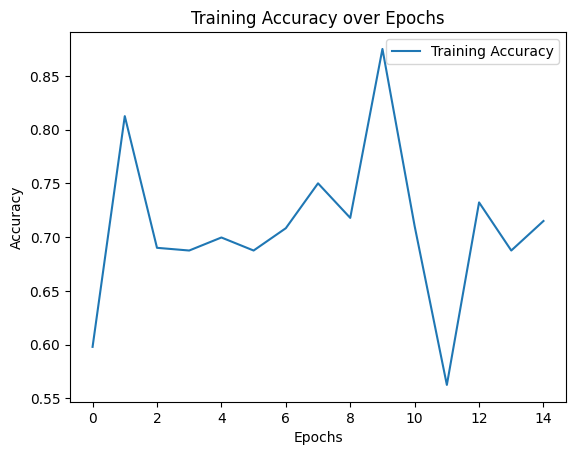

In [87]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.show()

In [ ]:
# validation_data = ImageDataGenerator(rescale=1/255.0)

# validation_generator = train_data.flow_from_directory(
#     validation_dir,
#     target_size=(300, 300),
#     class_mode='binary'
# )


# history = model.fit(
#     train_generator,
#     validation_data= validation_generator,
#     epochs=15,
# )

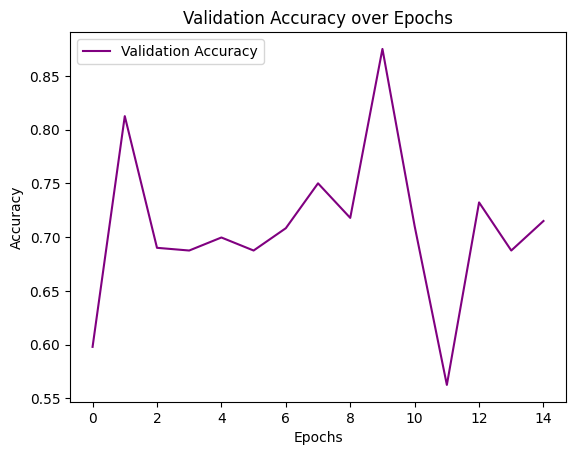

In [88]:
plt.plot(history.history['accuracy'], label='Validation Accuracy', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.show()

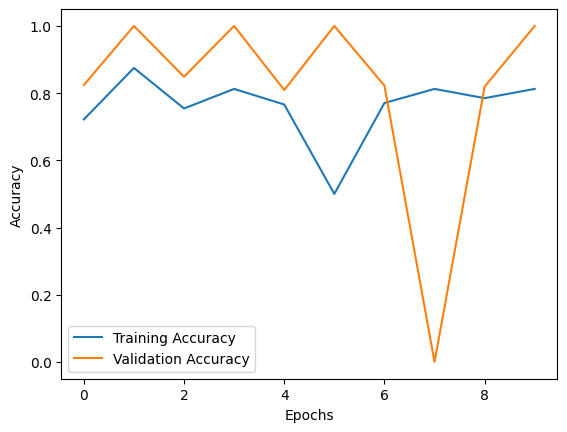

In [93]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load and preprocess the new image
img_path = "content/Image_10.jpg"
img = image.load_img(img_path, target_size=(300, 300))
img_array = image.img_to_array(img) / 255  # Rescale to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# # Make prediction
# prediction = model.predict(img_array)
# if prediction[0] > 0.5:
#     print("Predicted:  cool drink can")
# else:
#     print("Predicted:  Plastic Bottle ")



prediction = model.predict(img_array)
# Interpret the prediction
if prediction[0] > 0.5:
    label = "Plastic Bottle "
    
else:
    label = " Cool Drink Can"

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {label}")  
plt.axis('off')
plt.show()
    


In [ ]:
model.save('convolution_neuron_network/cnn_preprained.h5')